In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier

# This was done following the online lecture on the task. csv is uploaded also.
df = pd.read_csv("train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop("label", axis=1).values
y = df["label"].values
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


(42000, 784)
(42000,)


The train set is used to learn the relationships between the features and the target variable. The model's performance on the training set is used as an indicator of how well the model has learned the training data.

The development set is used to tune the model's parameters, such as the number of estimators or the depth of a tree. The performance of the model on the development set is a good indicator of how well the model will perform on unseen data.

The test set is used as a final evaluation of the model's performance. It is used to assess the performance of the model on unseen data. The accuracy of the model on the test set is the most reliable indicator of how well the model will perform on real-world data.

In [5]:
clf = RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(X_train, y_train)
preds= clf.predict(X_test)


feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

405    0.010196
155    0.009657
350    0.008056
434    0.007986
461    0.007607
         ...   
309    0.000000
336    0.000000
337    0.000000
364    0.000000
783    0.000000
Length: 784, dtype: float64

In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

n_estimators would be chosen as the parameter to tune as it has a direct impact on the performance of the  model and can lead to improved accuracy in prediction.

Text(0.5, 1.0, 'Confusion Matrix')

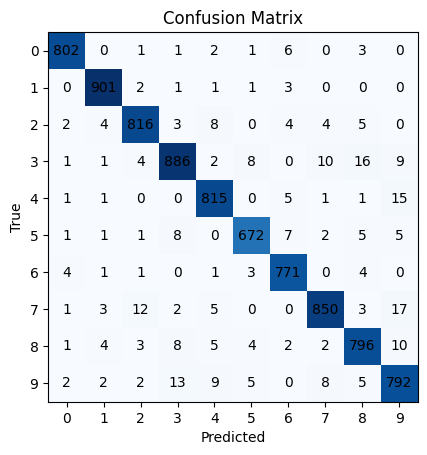

In [7]:
conf_mat = confusion_matrix(y_test, preds)

fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9])
ax.set_xlabel('Predicted')
ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9])
ax.set_ylabel('True')


for i in range(10):
    for j in range(10):
        ax.text(j, i, conf_mat[i, j],
                ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")


The model struggles with classes 3, 7, 8, 9 the most

In [8]:
print("Accuracy score:", accuracy_score(y_test, preds))
print("Precision score:", precision_score(y_test, preds,average='macro'))
print("Recall score:", recall_score(y_test, preds,average='macro'))
print("f1 score:", f1_score(y_test, preds,average='macro'))


Accuracy score: 0.9644047619047619
Precision score: 0.964421233856166
Recall score: 0.9645225831195674
f1 score: 0.9644387869972887
